In [1]:
import os
os.chdir('../../')
!ls

food_trade


In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy import stats
from food_trade.demand_supply.balance_trade import get_area_codes, get_prod_matrix, get_trade_matrix, re_export_algo
import seaborn as sns

In [300]:
df_country_log_false_thresh_10 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_false_thresh_10.parquet.gzip')
df_country_log_true_thresh_10 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_true_thresh_10.parquet.gzip')
df_country_log_false_thresh_pt001 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_false_thresh_pt001.parquet.gzip')
df_country_log_true_thresh_pt001 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_true_thresh_pt001.parquet.gzip')

In [301]:
df = df_country_log_true_thresh_10
trade = df.groupby(['to_iso3']).sum()[['trade']].reset_index().rename(columns={'trade': 'imports', 'to_iso3': 'iso3'}).merge(
    df.groupby(['from_iso3']).sum()[['trade']].reset_index().rename(columns={'trade': 'exports', 'from_iso3': 'iso3'}), how='outer')
trade = trade.fillna(0)

In [302]:
trade['flows'] = trade['imports'] + trade['exports']

<Axes: xlabel='imports', ylabel='Density'>

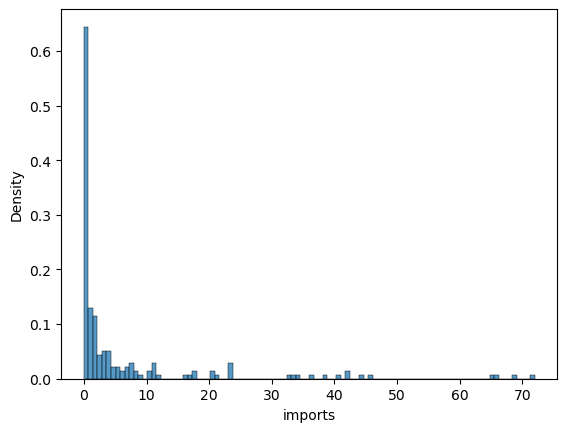

In [502]:
sns.histplot(x=trade['imports']/1e6, stat="density", bins=100)

<Axes: ylabel='Density'>

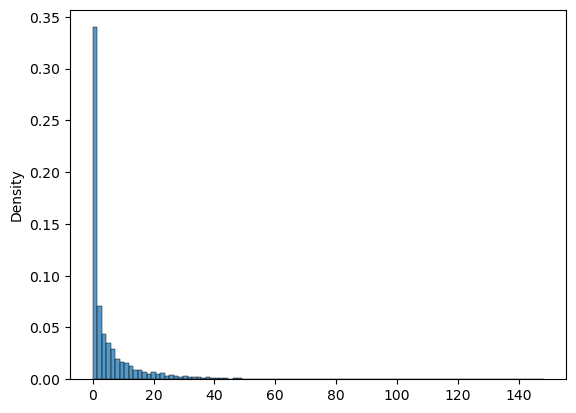

In [511]:
sample = stats.gamma.rvs(a=0.3, loc=0, scale=20, size=10000)
sns.histplot(x=sample, stat="density", bins=100)

In [592]:
stats.kstest(trade['imports']/1e6, 'gamma', args=(0.3, 0, 20))

KstestResult(statistic=0.08986557321390443, pvalue=0.08188797750180421, statistic_location=1.9769157612743082, statistic_sign=1)

<Axes: xlabel='exports', ylabel='Density'>

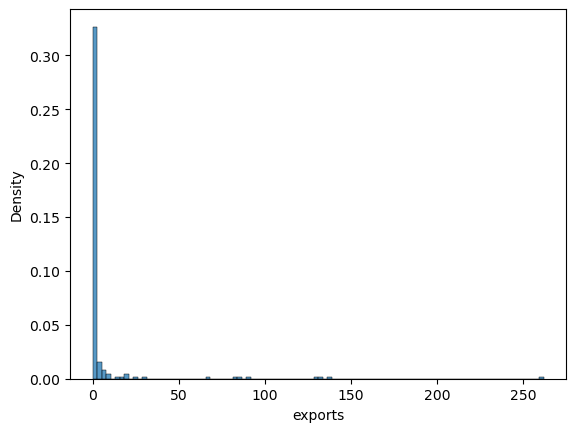

In [525]:
sns.histplot(x=trade['exports']/1e6, stat="density", bins=100)

<Axes: ylabel='Density'>

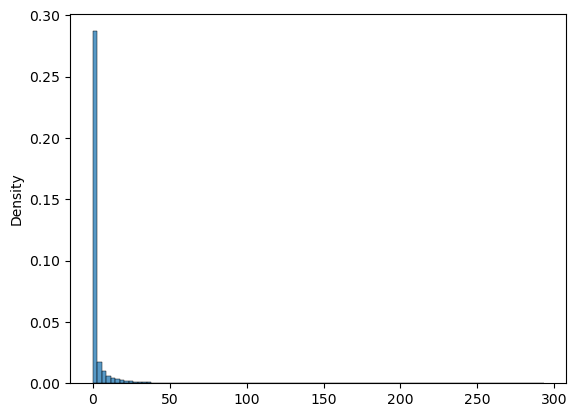

In [648]:
sample = stats.gamma.rvs(a=0.1, loc=0, scale=25, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [649]:
stats.kstest(trade['exports']/1e6, 'gamma', args=(0.1, 0, 25))

KstestResult(statistic=0.23711340206185566, pvalue=4.430643752664572e-10, statistic_location=0.0, statistic_sign=1)

<Axes: xlabel='flows', ylabel='Density'>

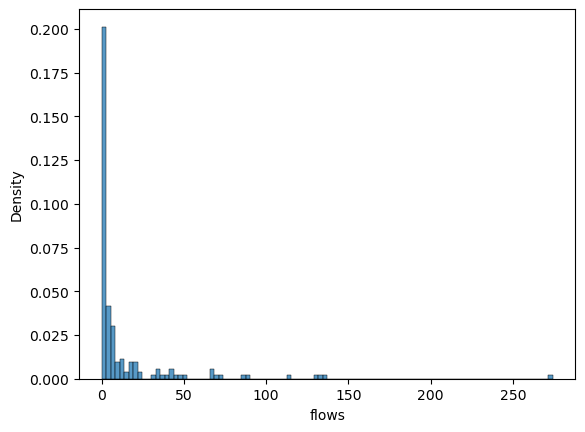

In [542]:
sns.histplot(x=trade['flows']/1e6, stat="density", bins=100)

<Axes: ylabel='Density'>

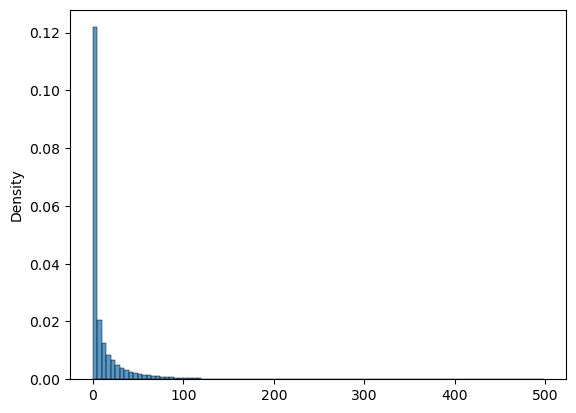

In [579]:
sample = stats.gamma.rvs(a=0.25, loc=0, scale=50, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [590]:
stats.kstest(trade['flows']/1e6, 'gamma', args=(0.25, 0, 50))

KstestResult(statistic=0.06993474339346462, pvalue=0.2853794285261966, statistic_location=8.342869276608816, statistic_sign=1)